# Recap - The Cars Dataset(Arabalar Veri Kümesi)

In [1]:
# 1 - DATA MANIPULATION
import pandas as pd
import numpy as np

# 2 - DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# 3 - STATISTICS
from statsmodels.graphics.gofplots import qqplot

# 4 - MACHINE LEARNING

## 4.1 - Preprocessing

### 4.1.1 - Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

### 4.1.2 - Encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### 4.1.3 - Crossvalidation, Training, Model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 4.1.4 - Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import ConfusionMatrixDisplay

# 🚗 The Cars dataset (Arabalar Veri Kümesi)

👇 Aşağıdaki kodu çalıştırarak [***ML_Cars_Recap_dataset.csv dataset***](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv) dosyasını içe aktarın 

In [2]:
aws_url = "https://d32aokrjazspmn.cloudfront.net/materials/ML_Cars_Recap_dataset.csv"
cars = pd.read_csv(aws_url)
cars.head()


# Not: CSV dosyalarını çevrim içi olarak saklamak yaygın bir uygulamadır. Bu dosya, LeWagon’un AWS hesabında saklanmaktadır.

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
1,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,four,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,five,3.40,5500.0,expensive


In [3]:
cars.shape # 205 araç x 8 feature


(205, 8)

ℹ️ Dataset’in açıklaması [burada](https://drive.google.com/file/d/1giEQ6GfDPw1exbzZlE-iN2iAVk6kiZrU/view?usp=sharing) mevcuttur.

❓ **Soru (Bilgilendirme)** ❓ Dataset’iniz hakkında bazı temel bilgileri toplayın.

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      205 non-null    object 
 1   carwidth        205 non-null    float64
 2   curbweight      205 non-null    float64
 3   enginetype      205 non-null    object 
 4   cylindernumber  205 non-null    object 
 5   stroke          205 non-null    float64
 6   peakrpm         205 non-null    float64
 7   price           205 non-null    object 
dtypes: float64(4), object(4)
memory usage: 12.9+ KB


In [5]:
cars.describe()

,carwidth,curbweight,stroke,peakrpm
count,205.000000,205.000000,205.000000,205.000000
mean,65.887940,2555.565854,3.255415,5125.121951
std,2.074414,520.680204,0.313597,476.985643
min,60.300000,1488.000000,2.070000,4150.000000
25%,64.200000,2145.000000,3.110000,4800.000000
50%,65.500000,2414.000000,3.290000,5200.000000
75%,66.500000,2935.000000,3.410000,5500.000000
max,72.300000,4066.000000,4.170000,6600.000000


In [6]:
cars["price"].value_counts()

price
expensive    123
cheap         82
Name: count, dtype: int64

# (1) 🛠 Veri hazırlama (Data preparation)

## (1.0) Önkoşullar (Pre-requisites)

❓ **Soru (Olası anormallikler)** ❓ 

- Veri tipleri nedeniyle değiştirilmesi gereken sütunlar var mı?
    - Lütfen buna göre gerekli düzenlemeleri yapın.

In [7]:
cars.dtypes

aspiration         object
carwidth          float64
curbweight        float64
enginetype         object
cylindernumber     object
stroke            float64
peakrpm           float64
price              object
dtype: object

## (1.1) Tekrarlananlar (Duplicates)

❓ **Soru (Tekrarlanan satırlar)** ❓

Cars dataset’inde bulunan tekrarlanan (duplicated) satır sayısını hesaplayın.

In [8]:
cars.duplicated().sum()

14

❓ **Soru (Yinelenenleri kaldır)** ❓ 

In [9]:
cars = cars.drop_duplicates()

## (1.2) Missing data

❓ **Soru (`NaN`)** ❓

Her bir özellik için `NaN` yüzdesi nedir?

In [10]:
(cars.isnull().sum() / len(cars)) * 100

aspiration        0.0
carwidth          0.0
curbweight        0.0
enginetype        0.0
cylindernumber    0.0
stroke            0.0
peakrpm           0.0
price             0.0
dtype: float64

<details>
    <summary><i>Cevap</i></summary>
    
😇 Bu bir mucize ama burada eksik değer yok. Bu not defterinin bir sonraki bölümüne geçebilirsiniz :)     
</details>

## (1.3)  Özellikleri $X$ ve hedefi $y$ tanımlama (Defining the features $X$ and the target $y$)

❓ **Soru** ❓

- Bu veri kümesinin özelliklerini $X$ değişkeninde saklayın.
- Hedefi $y$ değişkeninde saklayın.

In [11]:
X = cars.drop(columns=["price"])
y = cars["price"]

❓ **Soru (Hedefe hızlı bir bakış)** ❓ “Ucuz” arabaların “pahalı” arabalara oranı nedir? 

In [12]:
y.value_counts(normalize=True)

price
expensive    0.612565
cheap        0.387435
Name: proportion, dtype: float64

## (1.4) Sayısal özelliklerin ölçeklendirilmesi (Scaling numerical features)

❓ **Soru (sayısal sütunlara hızlı bir bakış)** ❓

- Tek bir kod satırında tüm sayısal sütunların kutu grafiklerini gösterin
- Histogramları kullanarak dağılımları için de aynısını yapın

<Axes: >

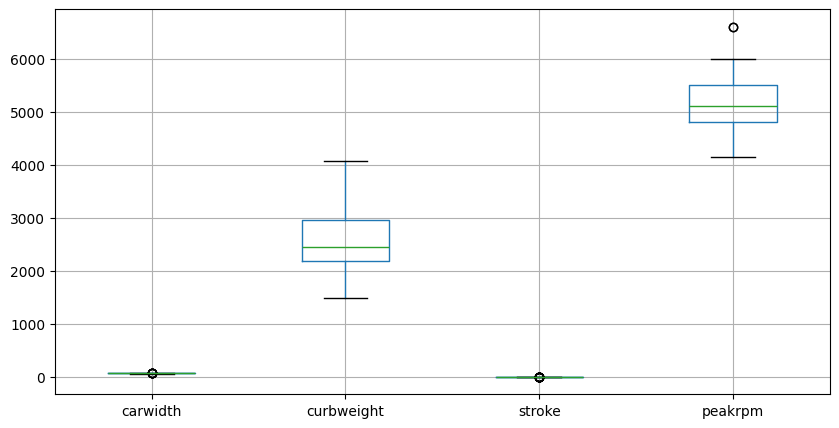

In [13]:
X.select_dtypes(exclude="object").boxplot(figsize=(10,5))

❓ **Soru (Sayısal sütunlara odaklanın)** ❓

Araba veri kümesinin sayısal sütunlarını `cars_num` içinde saklayın.

In [14]:
###########################
# Manuel çözüm            # - pek akıllıca değil
###########################

# num_features = ["carwidth", "curbweight", "cylindernumber", "stroke", "peakrpm"]
# cars_num = X[num_features]

# Bu, sayısal feature’ları seçmenin bir yolu...
# Ama pek akıllıca değil...

###########################
# Zarif çözüm             # - çok daha iyi
###########################

cars_num = X.select_dtypes(exclude=['object']) # yalnızca sayısal feature’ları seçiyoruz
cars_num


,carwidth,curbweight,stroke,peakrpm
0,64.10000,2548.0,2.68,5000.0
2,65.50000,2823.0,3.47,5000.0
3,65.88794,2337.0,3.40,5500.0
4,66.40000,2824.0,3.40,5500.0
5,66.30000,2507.0,3.40,5500.0
...,...,...,...,...
200,68.90000,2952.0,3.15,5400.0
201,68.80000,3049.0,3.15,5300.0
202,68.90000,3012.0,2.87,5500.0
203,68.90000,3217.0,3.40,4800.0


❓ **Soru (Sağlam Ölçeklendirici)** ❓

👨🏻‍🏫 Tüm sayısal özellikleri sağlam bir şekilde ölçeklendirmek, hızlı ve verimli bir ölçeklendirme yöntemidir.

In [15]:
# RobustScaler oluşturma
robust_scaler = RobustScaler().set_output(transform='pandas')

# Feature’ları ölçekleme ve saklama
cars_num_scaled = robust_scaler.fit_transform(cars_num)

# Ölçeklenmiş feature’ları gösterme
cars_num_scaled

,carwidth,curbweight,stroke,peakrpm
0,-0.555556,0.135659,-2.033333,-0.142857
2,-0.037037,0.490956,0.600000,-0.142857
3,0.106644,-0.136951,0.366667,0.571429
4,0.296296,0.492248,0.366667,0.571429
5,0.259259,0.082687,0.366667,0.571429
...,...,...,...,...
200,1.222222,0.657623,-0.466667,0.428571
201,1.185185,0.782946,-0.466667,0.285714
202,1.222222,0.735142,-1.400000,0.571429
203,1.222222,1.000000,0.366667,-0.428571


## (1.5) Kategorik özelliklerin kodlanması (Encoding categorical features)

❓ **Soru (Kategorik sütunlara odaklanın)** ❓

Arabalar veri kümesinin kategorik sütunlarını `cars_categorical` içinde saklayın.

In [16]:
# Manuel çözüm --> pek akıllıca değil

# categorical_features = ["aspiration", "enginetype"]
# cars_categorical = X[categorical_features]

# Zarif çözüm --> çok daha iyi
cars_categorical = X.select_dtypes(include=['object']) # yalnızca kategorik feature’ları seçiyoruz
cars_categorical

,aspiration,enginetype,cylindernumber
0,std,dohc,four
2,std,ohcv,six
3,std,ohc,four
4,std,ohc,five
5,std,ohc,five
...,...,...,...
200,std,ohc,four
201,turbo,ohc,four
202,std,ohcv,six
203,turbo,ohc,six


❓ **Soru: Kategorik özellikleri kodlarsak, beklenen sütun sayısı kaçtır?** ❓

❓ **Soru (OneHotEncoder): Kategorik feature’ları encode edin** ❓

<details>
    <summary><i>İpuçları</i></summary>
    
- Bir kategorik feature binary ise bir sütunu drop edin
- Tam matrisler kullanın (Sklearn estimator’ları sparse matrix’leri anlayamaz)
- Sonuçları `encoded_features` adlı bir Pandas DataFrame içine kaydedin
    - 💡 OHE bir DataFrame’e fit edildikten sonra, yeni sütun adlarına _`get_features_names_out()`_ ile erişebilirsiniz
    
</details>

In [18]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    drop="if_binary",
    sparse_output=False,
    handle_unknown="ignore"
)

encoded_array = ohe.fit_transform(cars_categorical)

encoded_features = pd.DataFrame(
    encoded_array,
    columns=ohe.get_feature_names_out(cars_categorical.columns),
    index=cars_categorical.index
)

encoded_features.head()

,aspiration_turbo,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## (1.6) Önceden işlenmiş tüm özellikleri birleştirme $X_{preprocessed}$ (Concatenating all the preprocessed features together )

❓ **Soru (önceden işlenmiş tüm özellikleri bir araya getirerek)** ❓

`cars_num_scaled` ve `encoded_features` öğelerini `X_preprocessed` öğesinde birleştirin.

In [19]:
X_preprocessed = pd.concat([cars_num_scaled, encoded_features], axis=1)
X_preprocessed.head()

,carwidth,curbweight,stroke,peakrpm,aspiration_turbo,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,-0.555556,0.135659,-2.033333,-0.142857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.037037,0.490956,0.600000,-0.142857,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.106644,-0.136951,0.366667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.296296,0.492248,0.366667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.259259,0.082687,0.366667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## (1.7) Hedefin kodlanması (Encoding the target )

❓ **Soru (Kategorik target’ın encode edilmesi)** ❓

Target değişkenini 📚[***LabelEncoder***](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) kullanarak encode edin.

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

y_encoded[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# (2) 🏋🏻‍♂️ Modelleme (Modeling (Logistic Regression))

🎯 Amacımız, bazı özelliklere dayanarak bir arabanın pahalı mı yoksa ucuz mu olacağını tahmin etmektir.

## (2.0) Cross-Validation

👩‍🏫 Machine Learning’de, farklı modelleri karşılaştırmak istediğinizde, Cross Validation her bir alt modelin performansını kabaca ve sağlam bir şekilde değerlendirmek için kullanılan güçlü bir yöntemdir.

 **Soru (Çapraz Doğrulama)(CrossValidation)** ❓

Bu veri kümesi için LogisticRegression'ın potansiyel performansı nedir?

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

cv_scores = cross_val_score(
    logreg,
    X_preprocessed,
    y_encoded,
    cv=5,
    scoring="accuracy"
)

cv_scores, cv_scores.mean()

(array([0.97435897, 0.89473684, 0.92105263, 0.94736842, 0.84210526]),
 0.9159244264507421)

- 🚀 Bu doğruluk umut verici, hadi daha da ileri gidelim!
- 🗣 İyi bir Regression / Classification modelinin ne olduğunu `Performance Metrics` ünitesinde tartışacağız.

## (2.1) Holdout Method

❓ **Soru (Holdout): Dataset’inizi %70 / %30 oranında train / test olarak ayırın** ❓

<details>
    <summary><i>İpucu</i></summary>

- Binary bir target için aslında `LabelEncoder` kullanmanız gerekmez.
    - Sklearn, binary bir target’ı algılayacak kadar akıllıdır.
    
</details>

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed,
    y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded
)

## (2.2) Training and evaluating

❓ **Soru: Lojistik regresyon modelini Train/Evaluate** 

In [23]:
# Logistic Regression modelini oluşturma
logreg = LogisticRegression(max_iter=100)

# Modeli eğitme
logreg.fit(X_train, y_train)

# Modeli değerlendirme
logreg.score(X_test, y_test)

0.9482758620689655

## (2.3) Predicting

❓ **Soru (Yeni bir “nokta”yı tahmin etme)** ❓

ML algoritmanız (az önce eğittiğiniz Logistic Regression), aşağıdaki özelliklere sahip bir arabanın pahalı olacağını düşünüyor mu?

In [24]:
new_car = pd.DataFrame(columns=X.columns)
new_car.loc[0] = ['std', 65.88793969849246, 1874.0, 'ohc', 'four', 3.11, 5400.0]
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,65.88794,1874.0,ohc,four,3.11,5400.0


> 👨🏻‍🏫 **Bir tahmin yapabilmek için, bu yeni aracın training set üzerinde uygulanan dönüşümlerin aynısından geçmesi gerekir!**

🌠 Bu recap’in büyük resmine [buradan](https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/prepare_dataset_fit_transform.png) göz atın!

In [ ]:
# 0 - Anormal verilerin düzeltilmesi

pass  # SENİN KODUN BURAYA

In [25]:
# 1 - Sayısal özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
cars_num_scaled = pd.DataFrame(
    scaler.fit_transform(cars_num),
    columns=cars_num.columns,
    index=cars_num.index
)

In [27]:
new_car_num = new_car[cars_num.columns]

new_car_num_scaled = pd.DataFrame(
    scaler.transform(new_car_num),
    columns=cars_num.columns,
    index=new_car.index
)

In [28]:
# 2 - Kategorik özelliklerin kodlanması
new_car_cat = new_car[cars_categorical.columns]

new_car_cat_encoded = pd.DataFrame(
    ohe.transform(new_car_cat),
    columns=ohe.get_feature_names_out(cars_categorical.columns),
    index=new_car.index
)

In [29]:
# 3 - Sayısal özellikleri ve kategorik özellikleri bir araya getirme
new_car_preprocessed = pd.concat(
    [new_car_num_scaled, new_car_cat_encoded],
    axis=1
)

In [30]:
# 4 - Tahmin
prediction = logreg.predict(new_car_preprocessed)
prediction

array([0])

In [31]:
if prediction[0] == 1:
    print("🚗 Tahmin: Araç PAHALI")
else:
    print("🚗 Tahmin: Araç UCUZ")

🚗 Tahmin: Araç UCUZ


# (3) 🧑🏿‍🏫 Veri Sızıntısı Hakkında Uyarı (Warning about Data Leakage)

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/cross_validation_data_leakage.png"  width=600>

🏁 Tebrikler! Artık veri seti hazırlama konusunda uzmansınız!
